# **Phase 3**: Dataset Visualization

This analysis utilizes the refined QM9 dataset, which contains molecular property data with multiple target variables representing different physical and chemical properties of molecules. The dataset includes the following key target properties:

| Variable | Description |
|----------|-------------|
| **mu** | Dipole moment |
| **alpha** | Polarizability |
| **homo** | Highest Occupied Molecular Orbital energy |
| **lumo** | Lowest Unoccupied Molecular Orbital energy |
| **gap** | HOMO-LUMO energy gap |
| **r2** | Electronic spatial extent |
| **zpve** | Zero-point vibrational energy |
| **U0** | Internal energy at 0K |
| **U** | Internal energy at 298.15K |
| **H** | Enthalpy at 298.15K |
| **G** | Free energy at 298.15K |
| **Cv** | Heat capacity at 298.15K |


This visualization study aims to:

1. **Correlation Analysis**
2. **Distribution Analysis**
3. **Skewness Assessment**
4. **Data Transformation**

### Methodology

The analysis employs several visualization techniques:
- **Correlation heatmaps** for understanding variable relationships
- **Histograms with KDE** for distribution analysis
- **Box plots** for outlier detection and quartile analysis
- **Before/after transformation comparisons** for data preprocessing evaluation

This comprehensive visualization approach provides insights into the molecular dataset's characteristics, helping to inform subsequent modeling and analysis decisions.


In [10]:
# Load Necessary Libraries + Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("dataset_9May.csv")  # Update the path if needed
df.head()


,Molecule,=O,O,C,N,-O,=N,=N-O,-tBu,-C(=O)H,...,homo,lumo,gap,r2,zpve,U0,U,H,G,Cv
0,O=C1C=CON=N1,1.0,2.0,3,2.0,0.0,0.0,0.0,0.0,0.0,...,-0.2630,-0.0607,0.2023,965.3567,0.049003,-375.430225,-375.421157,-375.420213,-375.469933,24.943
1,O=C1C=NOC=N1,1.0,2.0,3,2.0,0.0,0.0,0.0,0.0,0.0,...,-0.2701,-0.0861,0.1840,567.5171,0.055941,-375.359188,-375.354066,-375.353122,-375.388412,17.987
2,O=C1C=NON=C1,1.0,2.0,3,2.0,0.0,0.0,0.0,0.0,0.0,...,-0.2681,-0.1008,0.1674,577.0287,0.054950,-375.307060,-375.301908,-375.300964,-375.336105,18.514
3,O=C1C=NON=N1,1.0,2.0,2,3.0,0.0,0.0,0.0,0.0,0.0,...,-0.2714,-0.1200,0.1514,556.6358,0.041330,-391.337881,-391.332272,-391.331328,-391.367925,19.012
4,O=C1N=CON=N1,1.0,2.0,2,3.0,0.0,0.0,0.0,0.0,0.0,...,-0.2961,-0.0570,0.2391,913.3757,0.038631,-391.518453,-391.509552,-391.508608,-391.558096,23.419


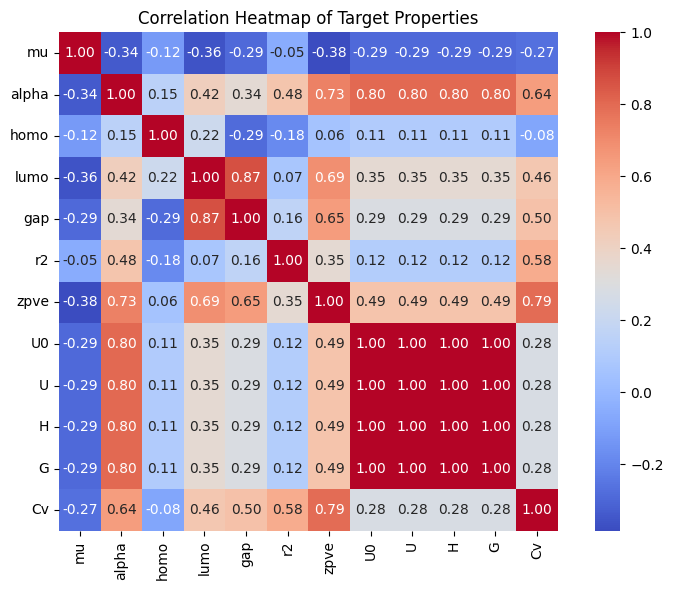

In [13]:
# Define the target columns
target_cols = [
    'mu', 'alpha', 'homo', 'lumo', 'gap', 'r2', 'zpve',
    'U0', 'U', 'H', 'G', 'Cv'
]

# Compute the correlation matrix
corr_targets = df[target_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_targets, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Target Properties")
plt.tight_layout()
plt.show()


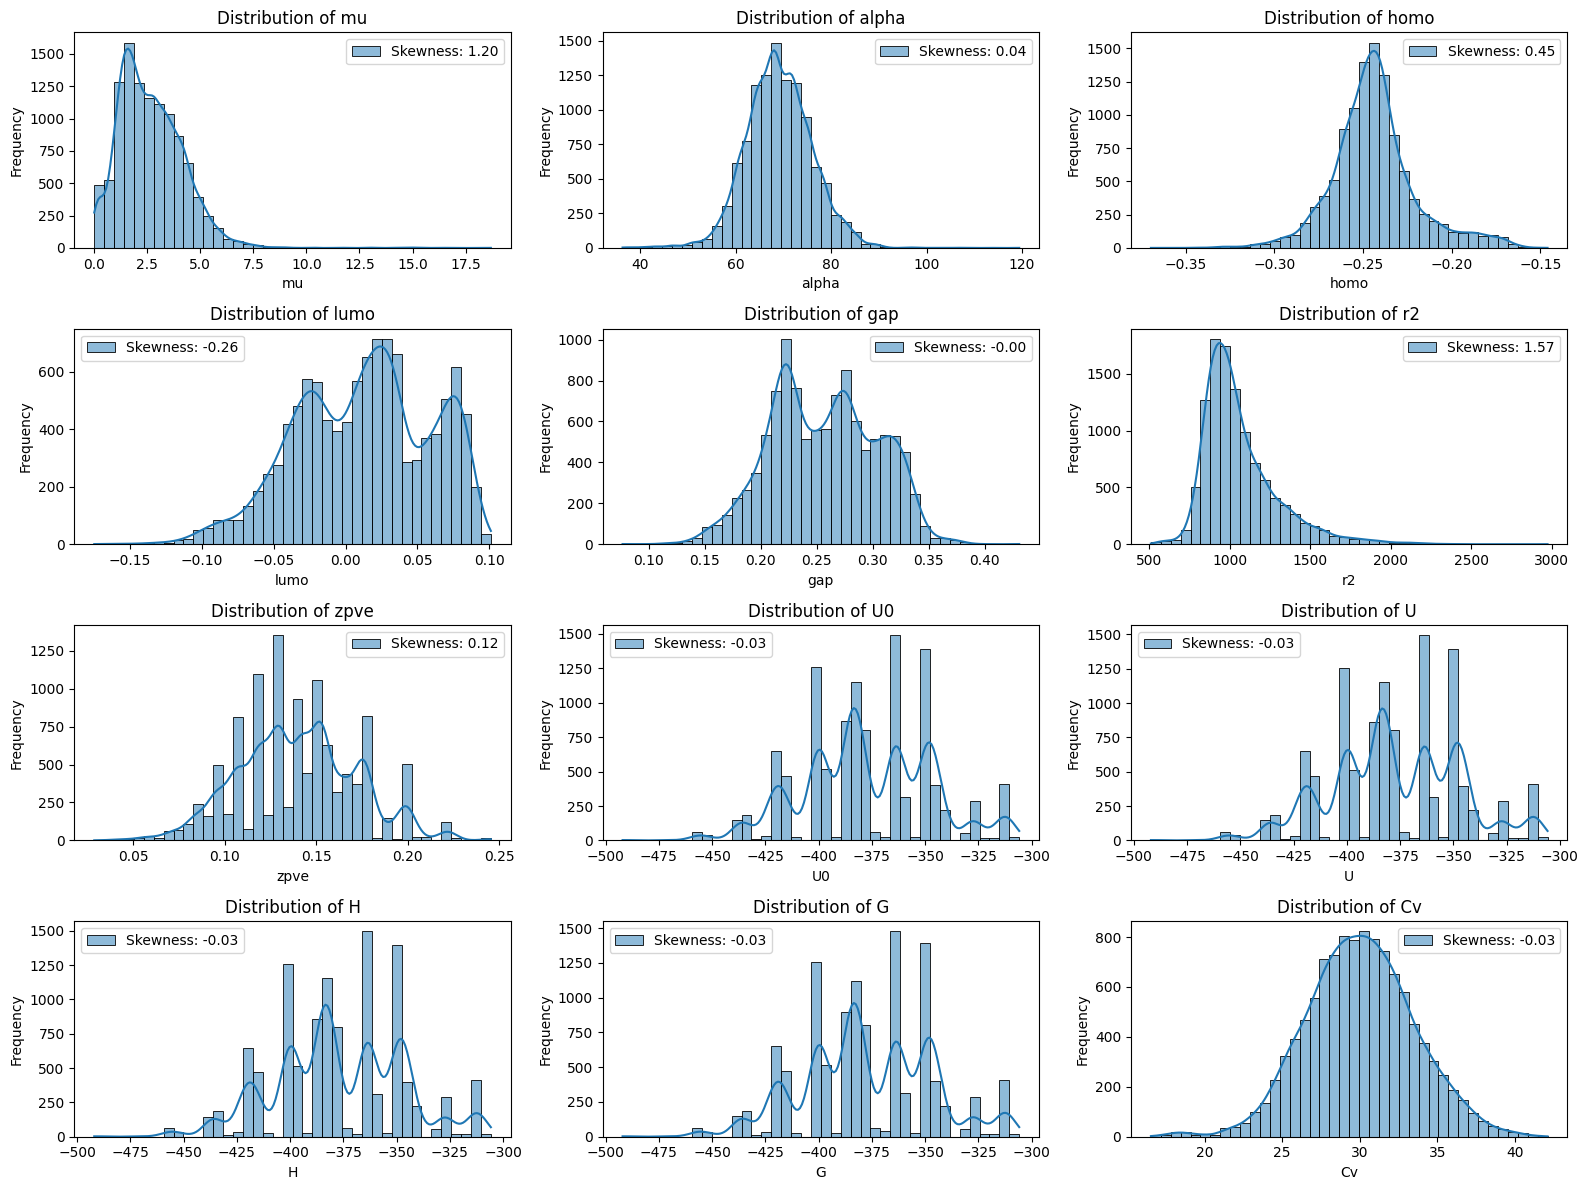

In [12]:
# Target Properties Distribution and Skewness
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(target_cols):
    skewness = df[col].skew()
    sns.histplot(df[col], kde=True, bins=40, ax=axes[i], label=f"Skewness: {skewness:.2f}")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].legend()

for j in range(len(target_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

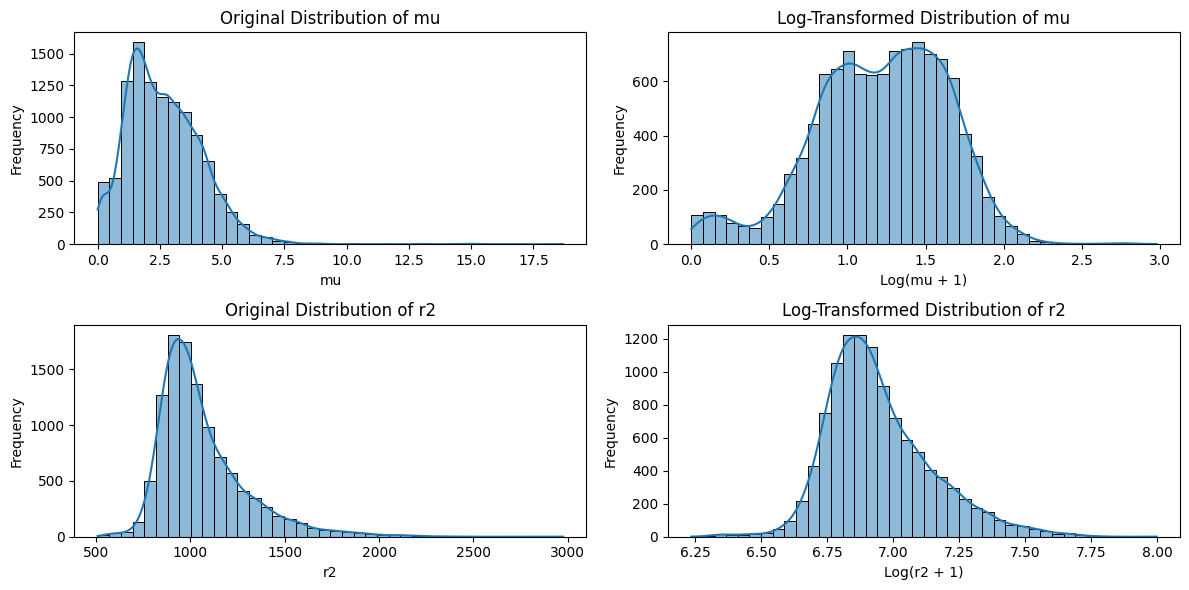

In [ ]:
# Log Transformation for mu
import numpy as np
original_mu = df['mu']
original_r2 = df['r2']
mu_transformed = df['mu'].apply(lambda x: np.log(x + 1))
r2_transformed = df['r2'].apply(lambda x: np.log(x + 1))

# Plotting the transformed distribution - subplot
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(original_mu, kde=True, bins=40)
plt.title("Original Distribution of mu")
plt.xlabel("mu")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
sns.histplot(mu_transformed, kde=True, bins=40)
plt.title("Log-Transformed Distribution of mu")
plt.xlabel("Log(mu + 1)")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
sns.histplot(original_r2, kde=True, bins=40)
plt.title("Original Distribution of r2")
plt.xlabel("r2")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
sns.histplot(r2_transformed, kde=True, bins=40)
plt.title("Log-Transformed Distribution of r2")
plt.xlabel("Log(r2 + 1)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

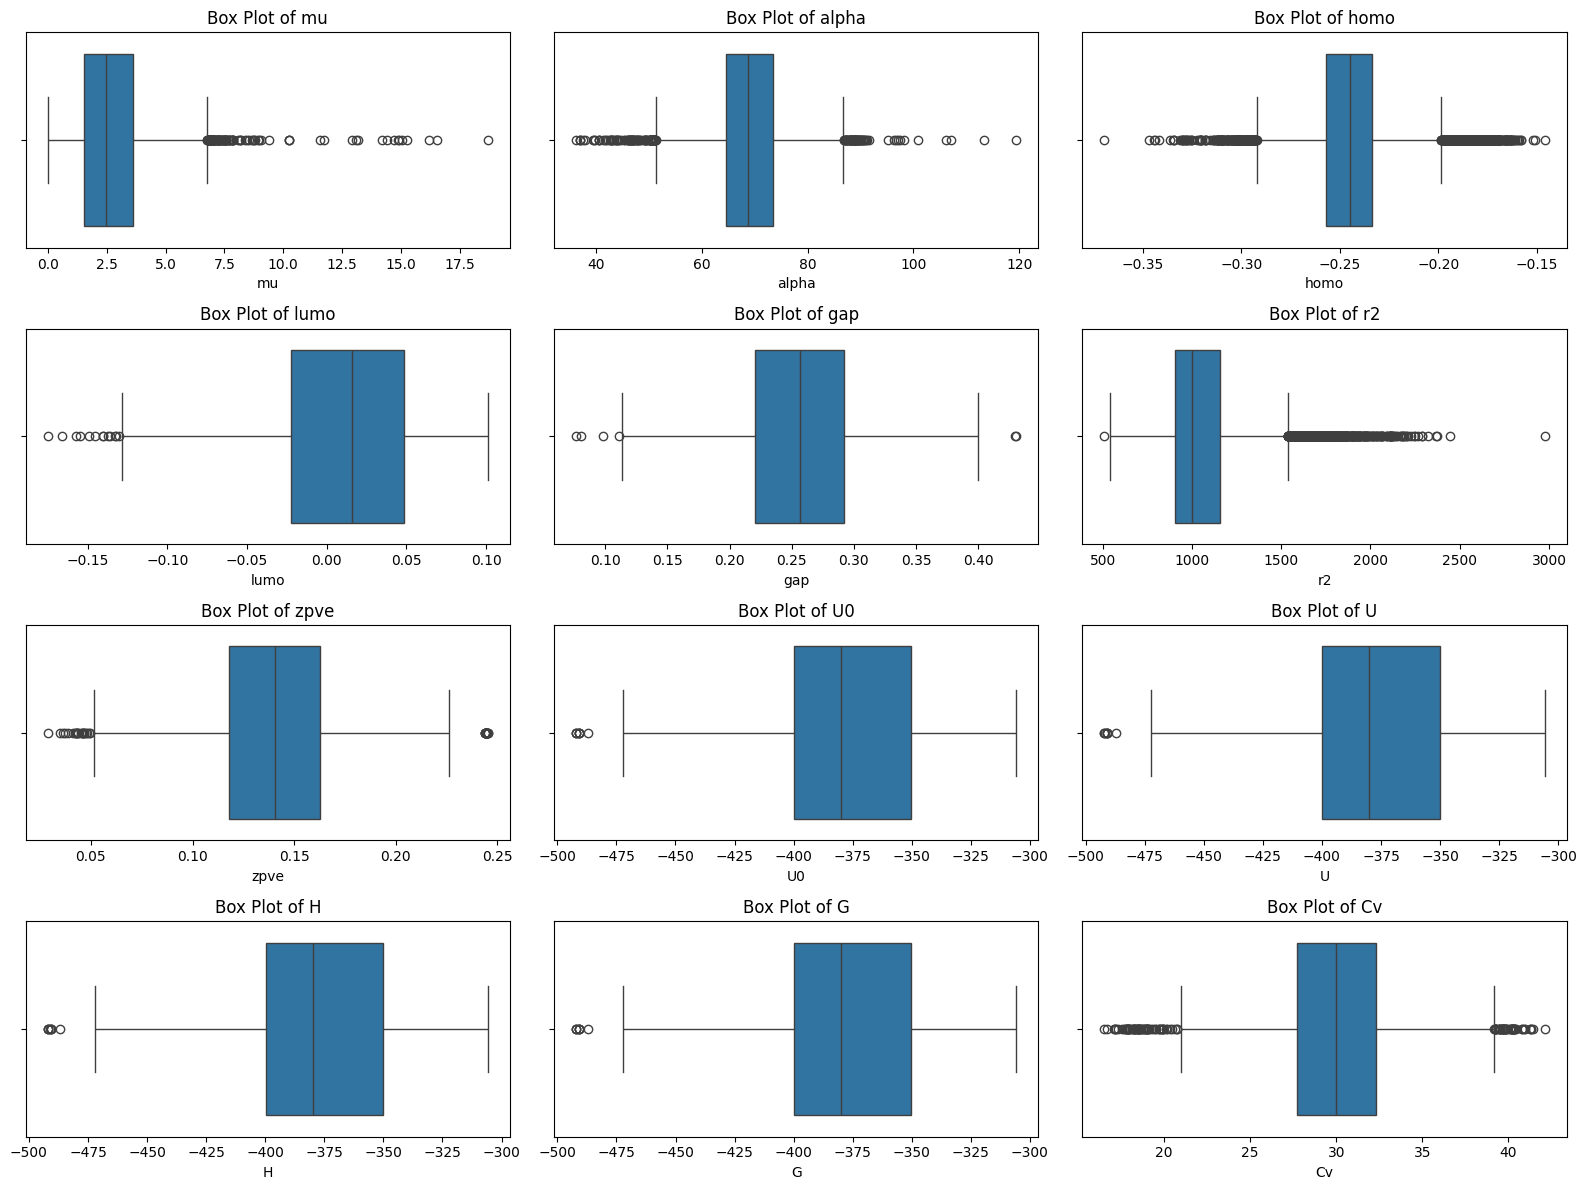

In [15]:
# Subplot Box Plot for each target variable
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 12))
axes = axes.flatten()
for i, col in enumerate(target_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Box Plot of {col}")
    axes[i].set_xlabel(col)

# Hide any unused subplots (in case total < rows*cols)
for j in range(len(target_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

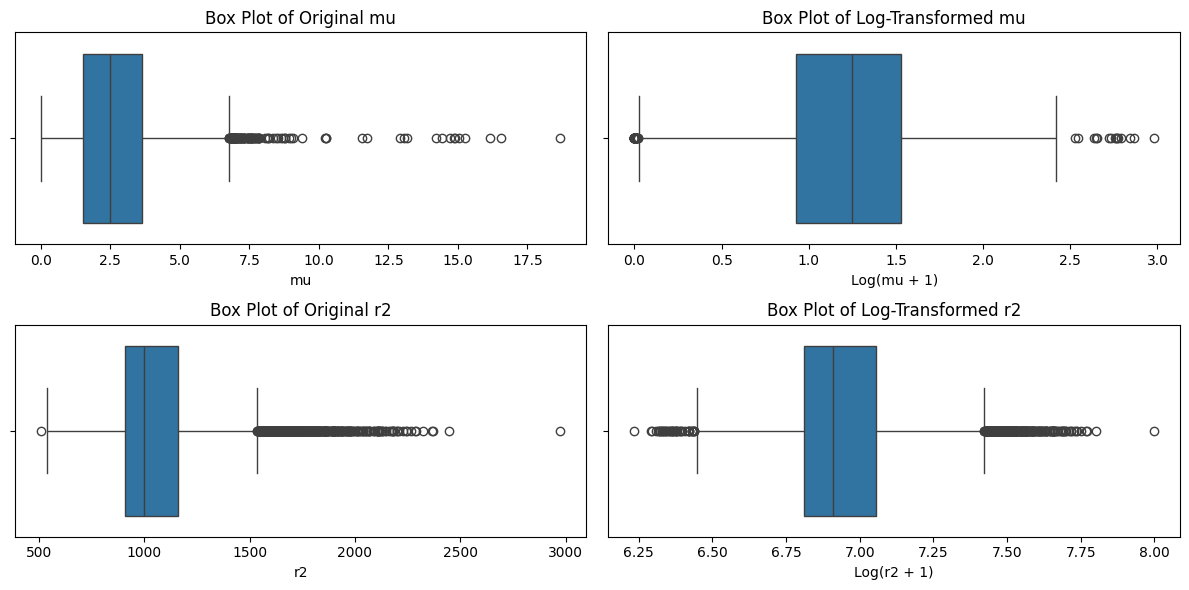

In [16]:
# Box plots for transformed variables - subplot
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x=original_mu)
plt.title("Box Plot of Original mu")
plt.xlabel("mu")

plt.subplot(2, 2, 2)
sns.boxplot(x=mu_transformed)
plt.title("Box Plot of Log-Transformed mu")
plt.xlabel("Log(mu + 1)")

plt.subplot(2, 2, 3)
sns.boxplot(x=original_r2)
plt.title("Box Plot of Original r2")
plt.xlabel("r2")

plt.subplot(2, 2, 4)
sns.boxplot(x=r2_transformed)
plt.title("Box Plot of Log-Transformed r2")
plt.xlabel("Log(r2 + 1)")

plt.tight_layout()
plt.show()